<a href="https://colab.research.google.com/github/RidloSuhardi-1/PCVK_GENAP_2021/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob

 Gamma Correction pada Citra 
-----------------------------
masukkan nilai gamma: 3


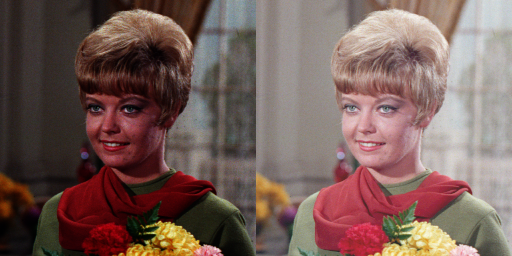

In [4]:
# 1

print(' Gamma Correction pada Citra ')
print('-----------------------------')
try:
  gamma = int(input('masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
gamma_img = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_img[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

 Simulasi Image Depth 
-----------------------------
masukkan nilai bit: 2


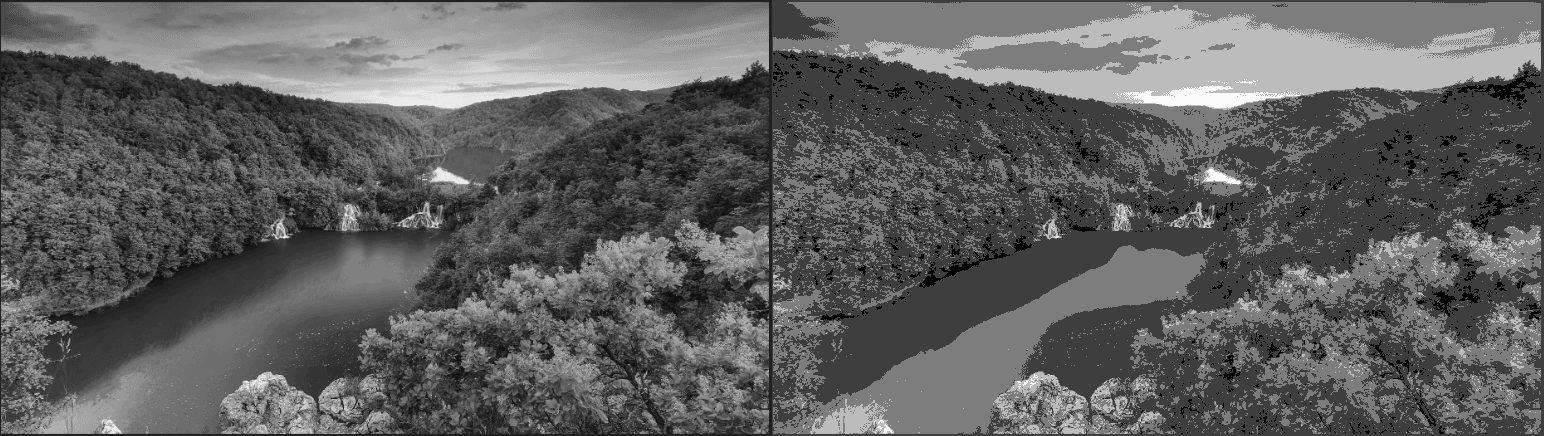

In [12]:
# 2

print(' Simulasi Image Depth ')
print('-----------------------------')
try:
  depth = int(input('masukkan nilai bit: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Images/jungle.png', cv.IMREAD_GRAYSCALE)
depth_img = np.zeros(original.shape, original.dtype)

level = 255 / (2 ** depth) - 1

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_img[y,x] = np.clip(np.round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_img))
cv2_imshow(final_frame)

In [19]:
# 3

def PSNR(img, amount):
  first_img = img[0]
  for x in range(1, amount):
    if (x == 0):
      continue
    first_img = first_img - img[x]
  mse = np.mean((first_img) ** amount)
  if (mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

print(' Average Denoising ')
print('-----------------------------')

try:
  howmany = int(input('masukkan jumlah hasil: '))
except ValueError:
  print('Error, not a number')

for b in range(howmany):
  try:
    avg = int(input('masukkan jumlah average citra: '))
  except ValueError:
    print('Error, not a number')

  result = PSNR(cv_img, avg)

  print()
  print('nilai PSNR %s: %s'%(avg, result))



 Average Denoising 
-----------------------------
masukkan jumlah hasil: 5
masukkan jumlah average citra: 5

nilai PSNR 5: 28.357947348059824
masukkan jumlah average citra: 30

nilai PSNR 30: 30.16807467263462
masukkan jumlah average citra: 60

nilai PSNR 60: 30.33028131025169
masukkan jumlah average citra: 80

nilai PSNR 80: 31.24267477127725
masukkan jumlah average citra: 100

nilai PSNR 100: 30.295078956516498


 Image Masking 
-----------------------------


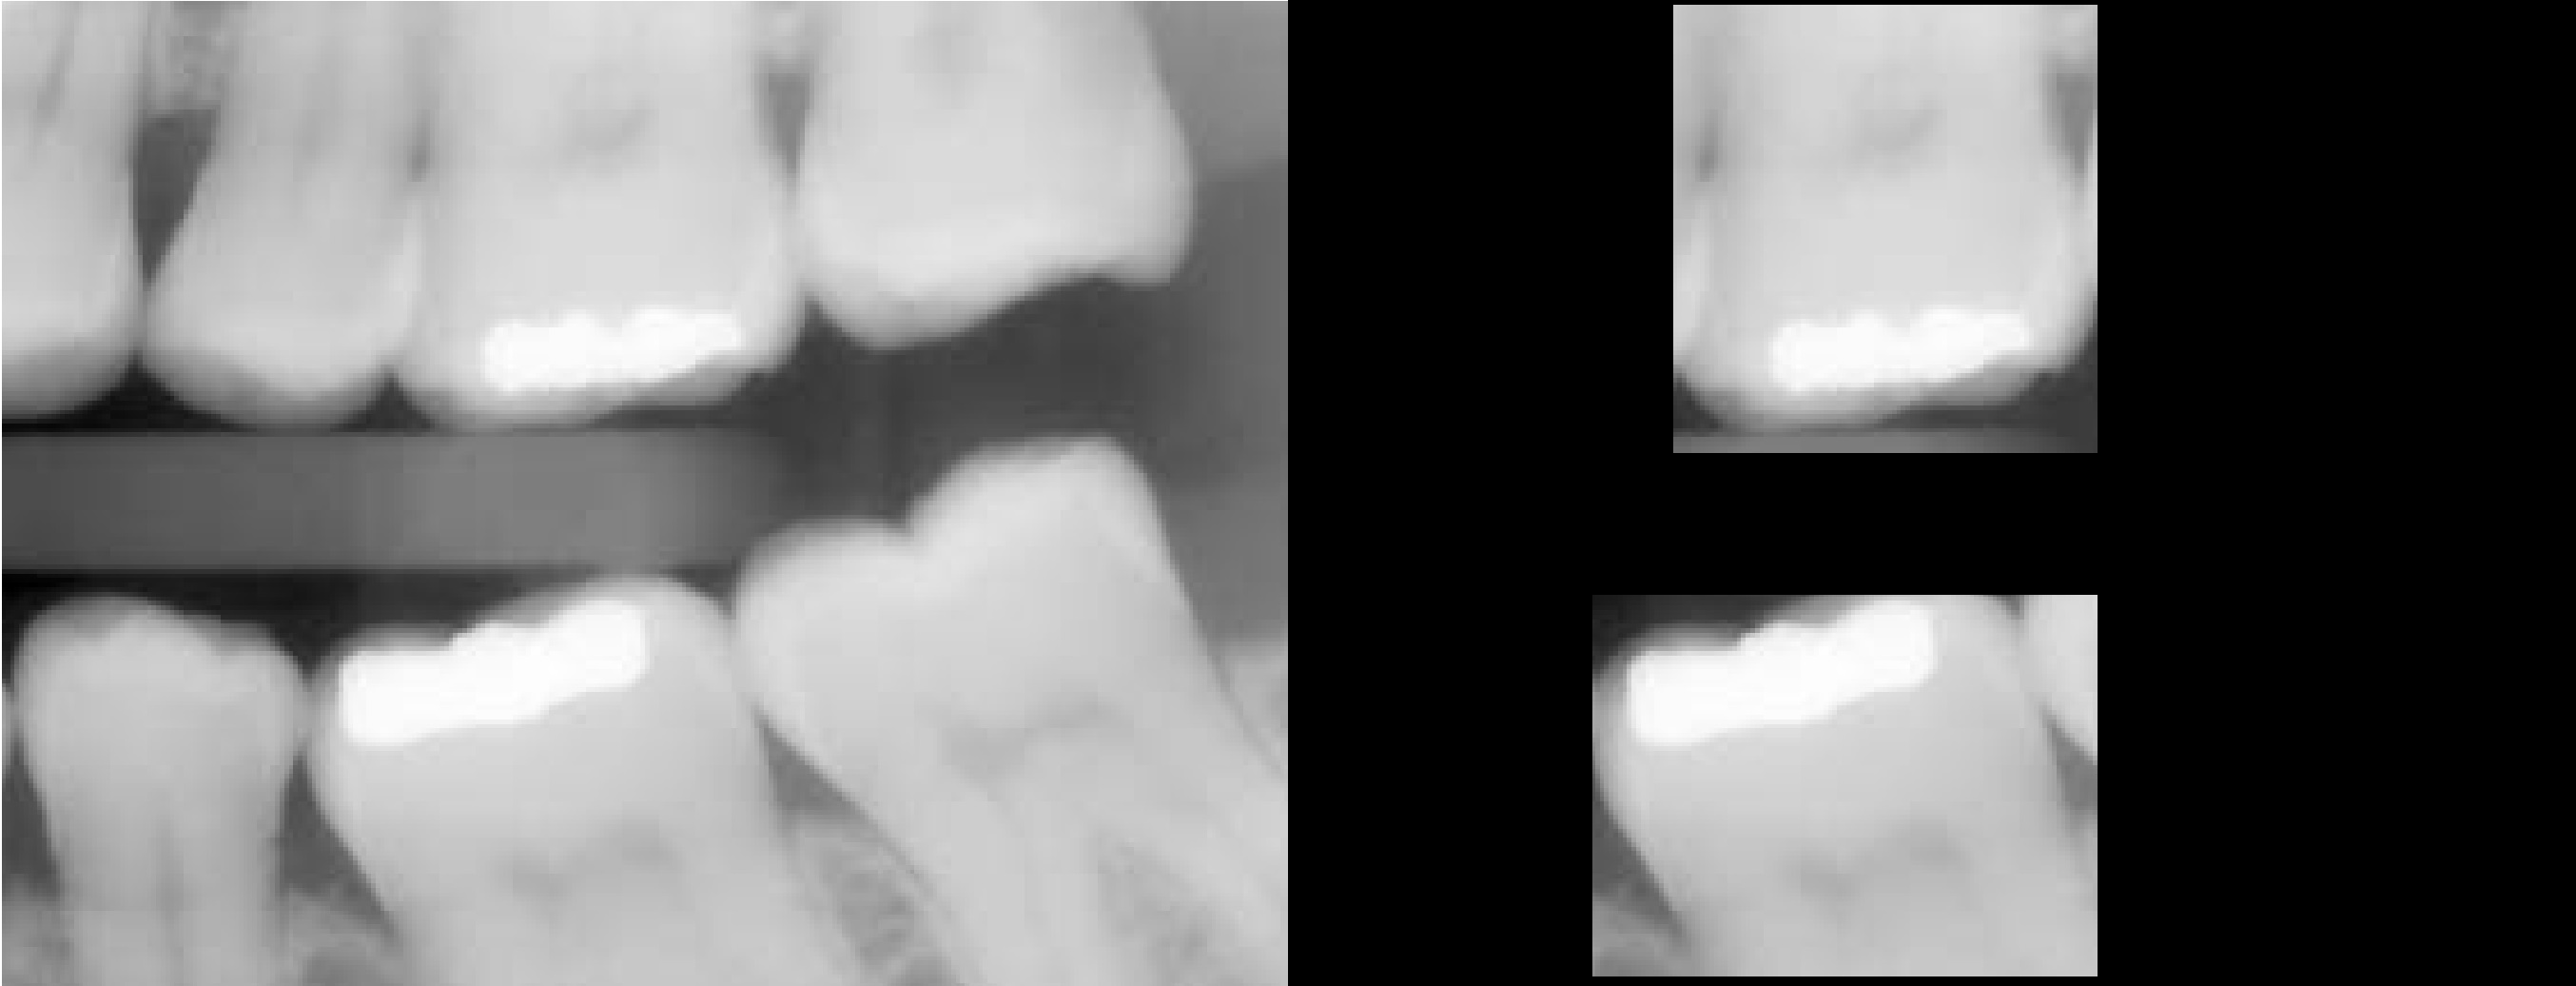

In [46]:
# 4

print(' Image Masking ')
print('-----------------------------')

original = cv.imread('/content/drive/MyDrive/Images/Images/teeth.jpg')
mask_img = np.zeros(original.shape, dtype=np.uint8)
mask_top = cv.rectangle(mask_img,pt1=(405,5),pt2=(850,475),color=(255,255,255),thickness=-1)
mask_bottom = cv.rectangle(mask_img, pt1=(320,625), pt2=(850,1025), color=(255,255,255), thickness=-1)

result_1 = original & mask_top
result_2 = original & mask_bottom

final_frame = cv.hconcat((img, result_1))
cv2_imshow(final_frame)

 Image Masking (OR NOT NAND XOR) 
-----------------------------
OR
-----------------------------


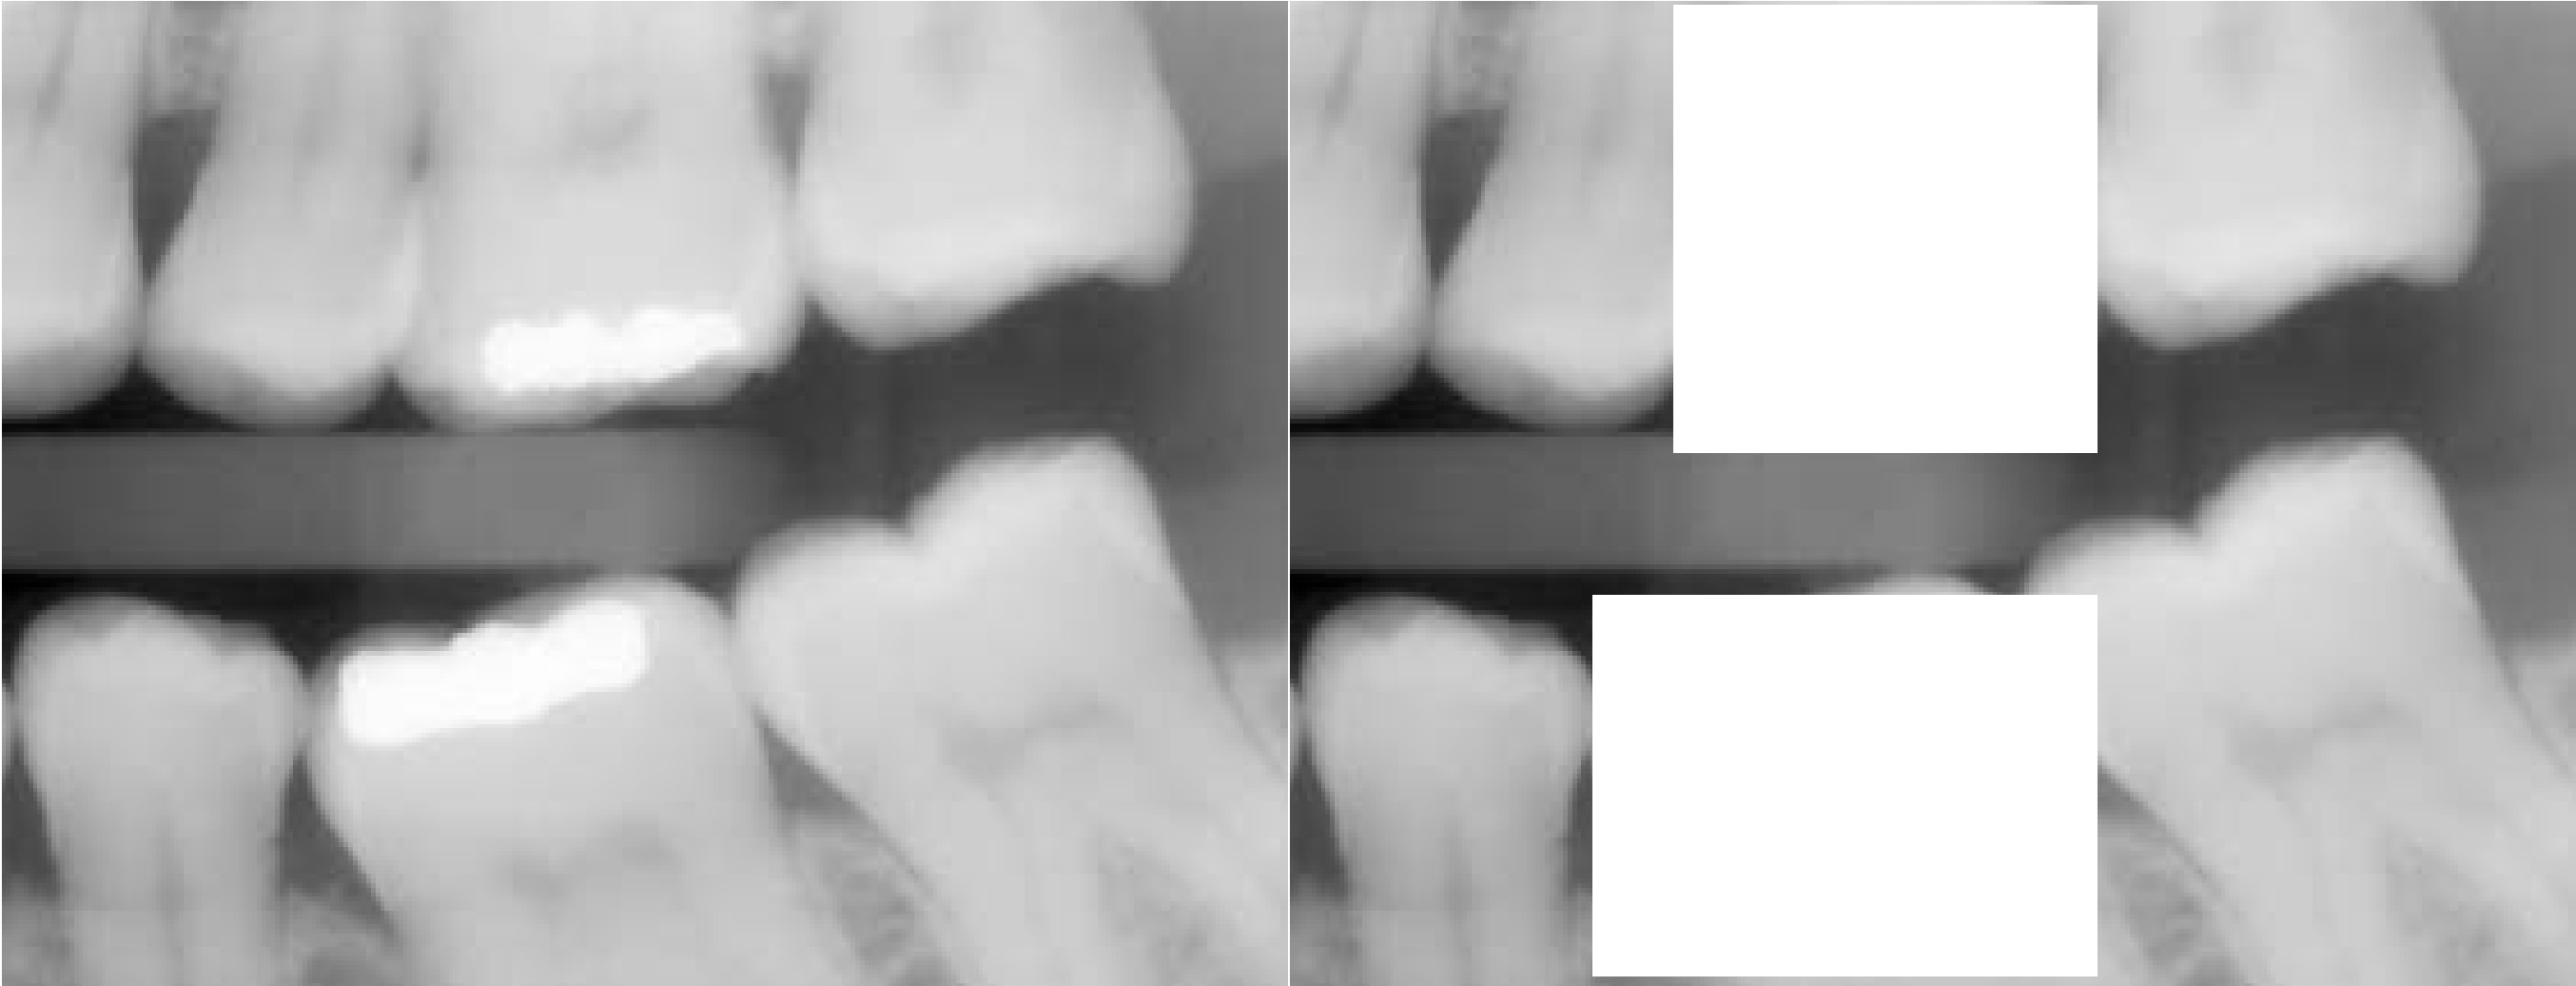

NOT
-----------------------------


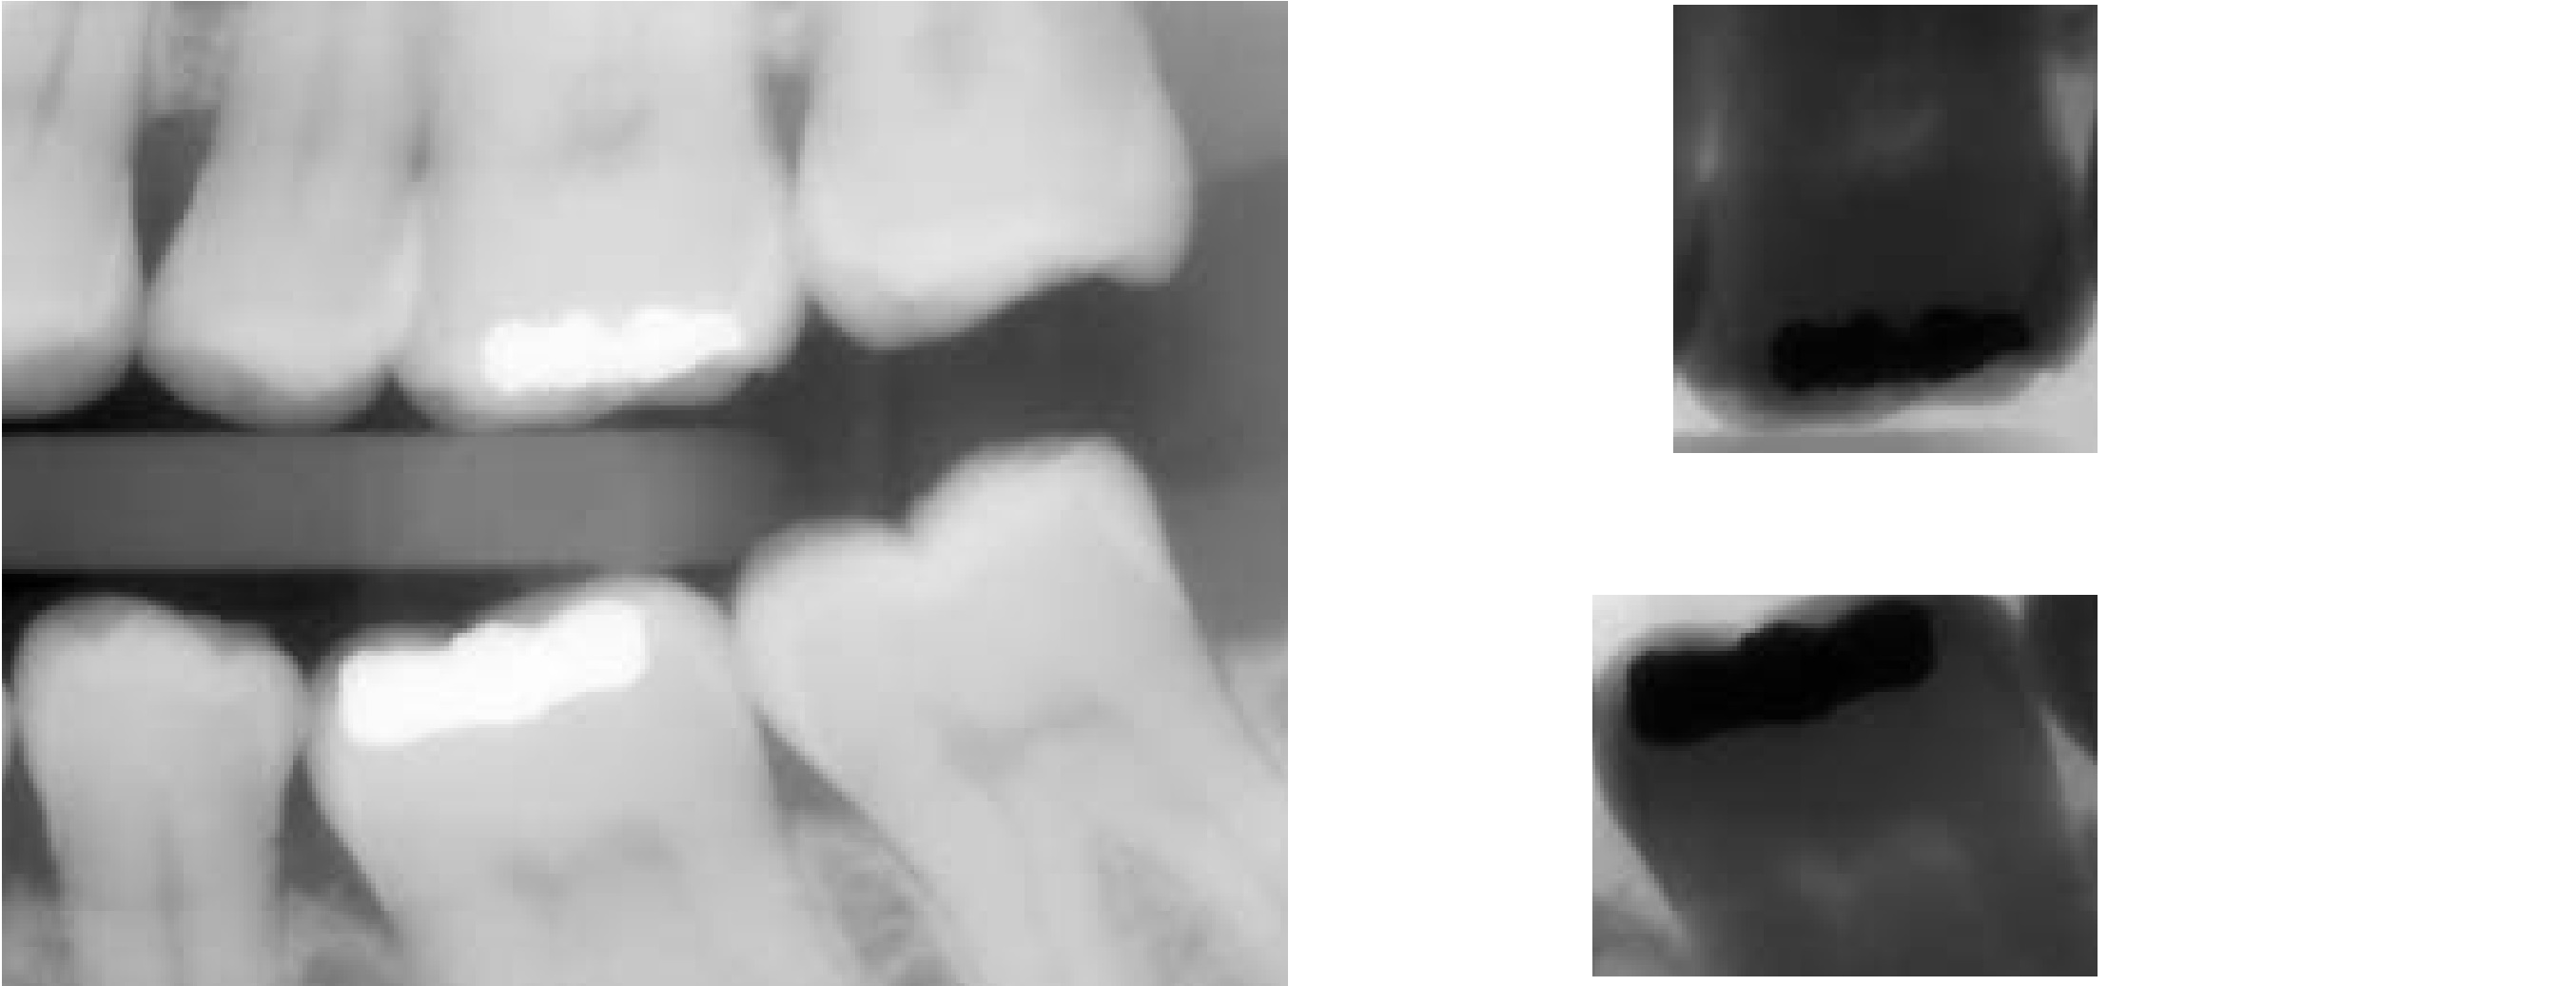

NAND
-----------------------------


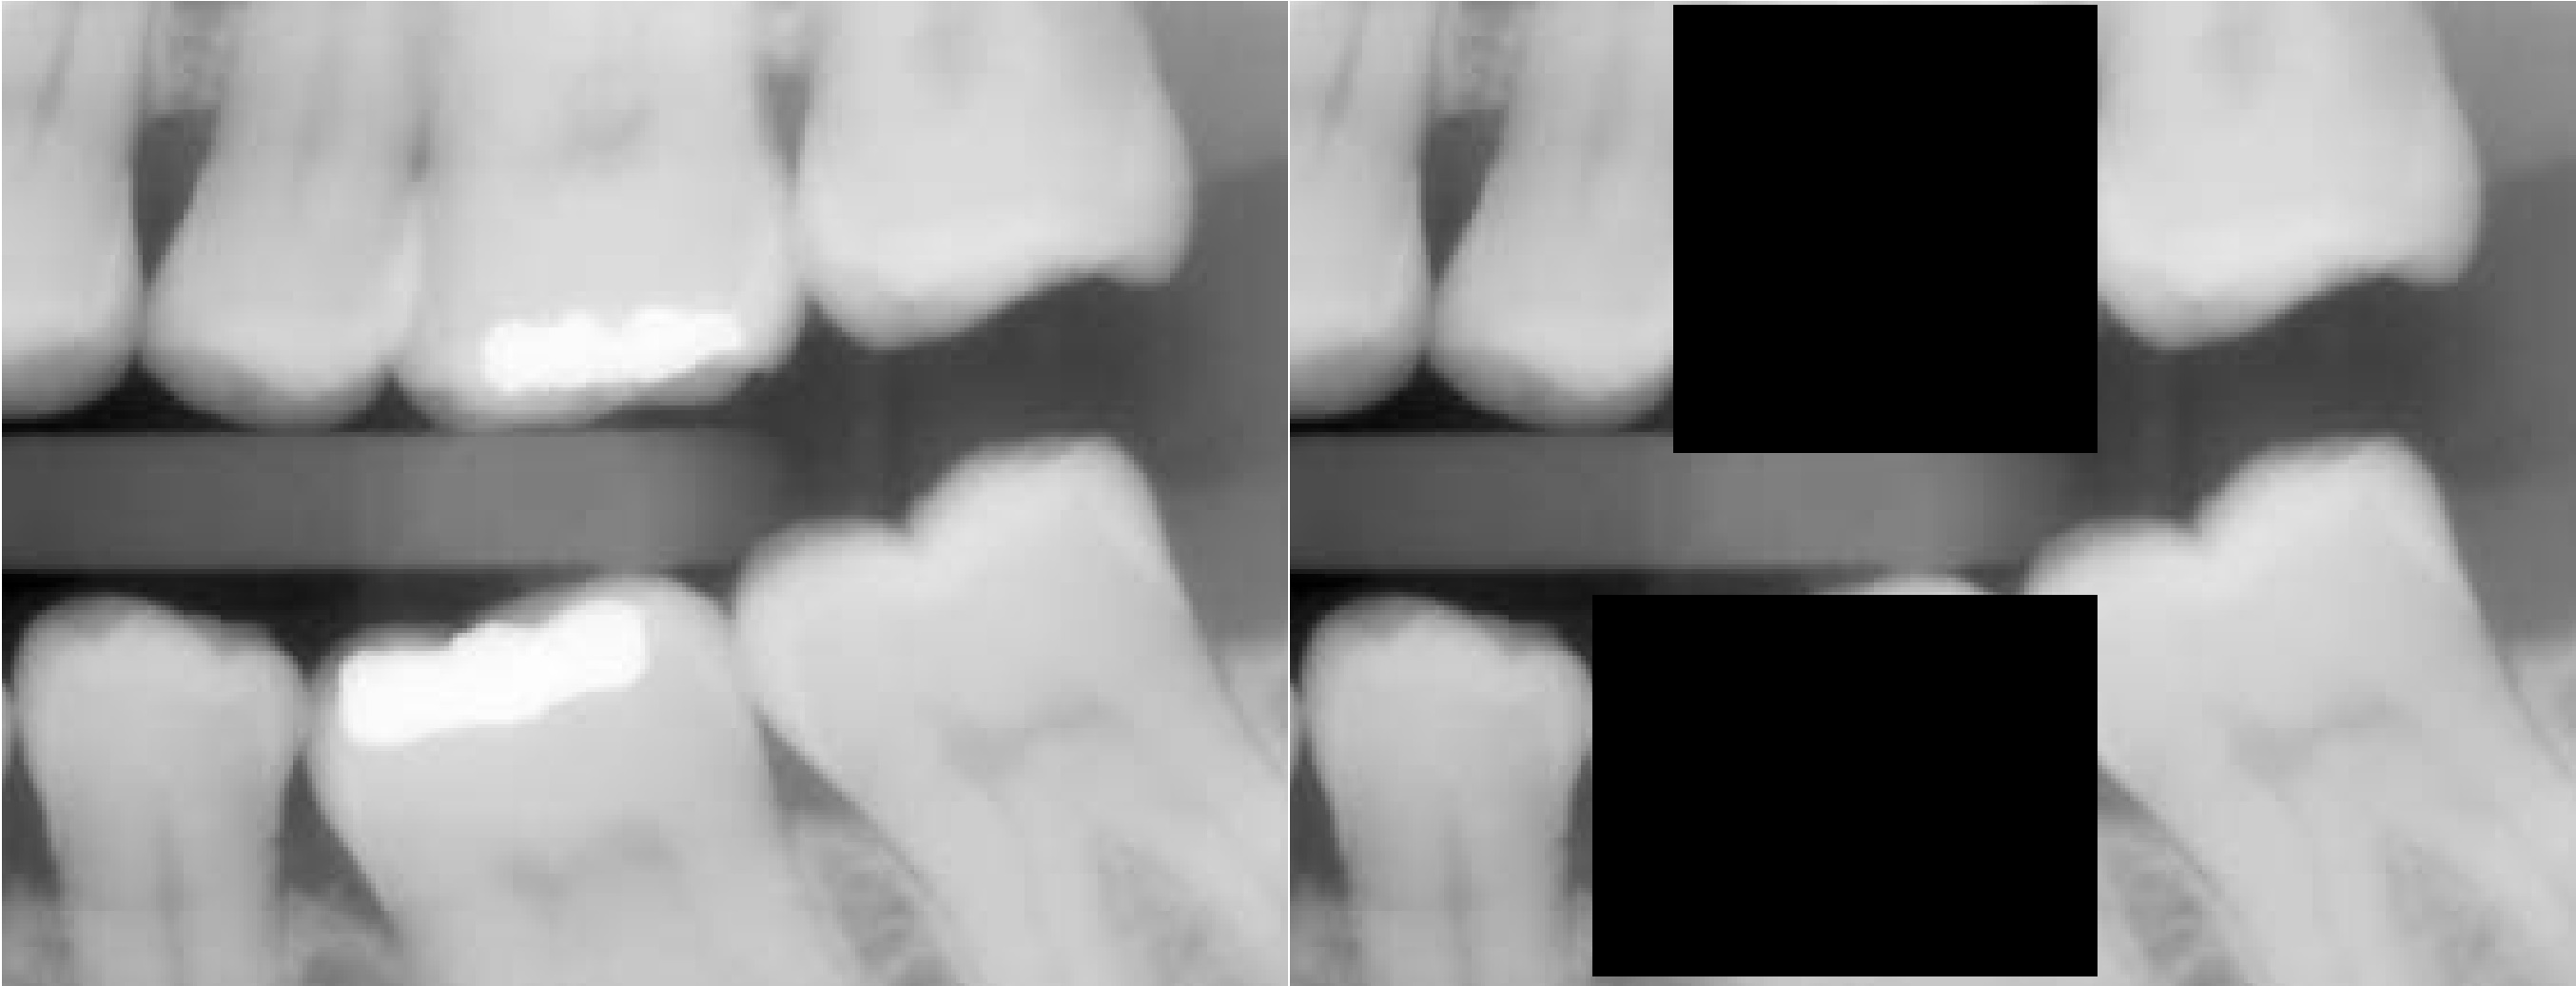

XOR
-----------------------------


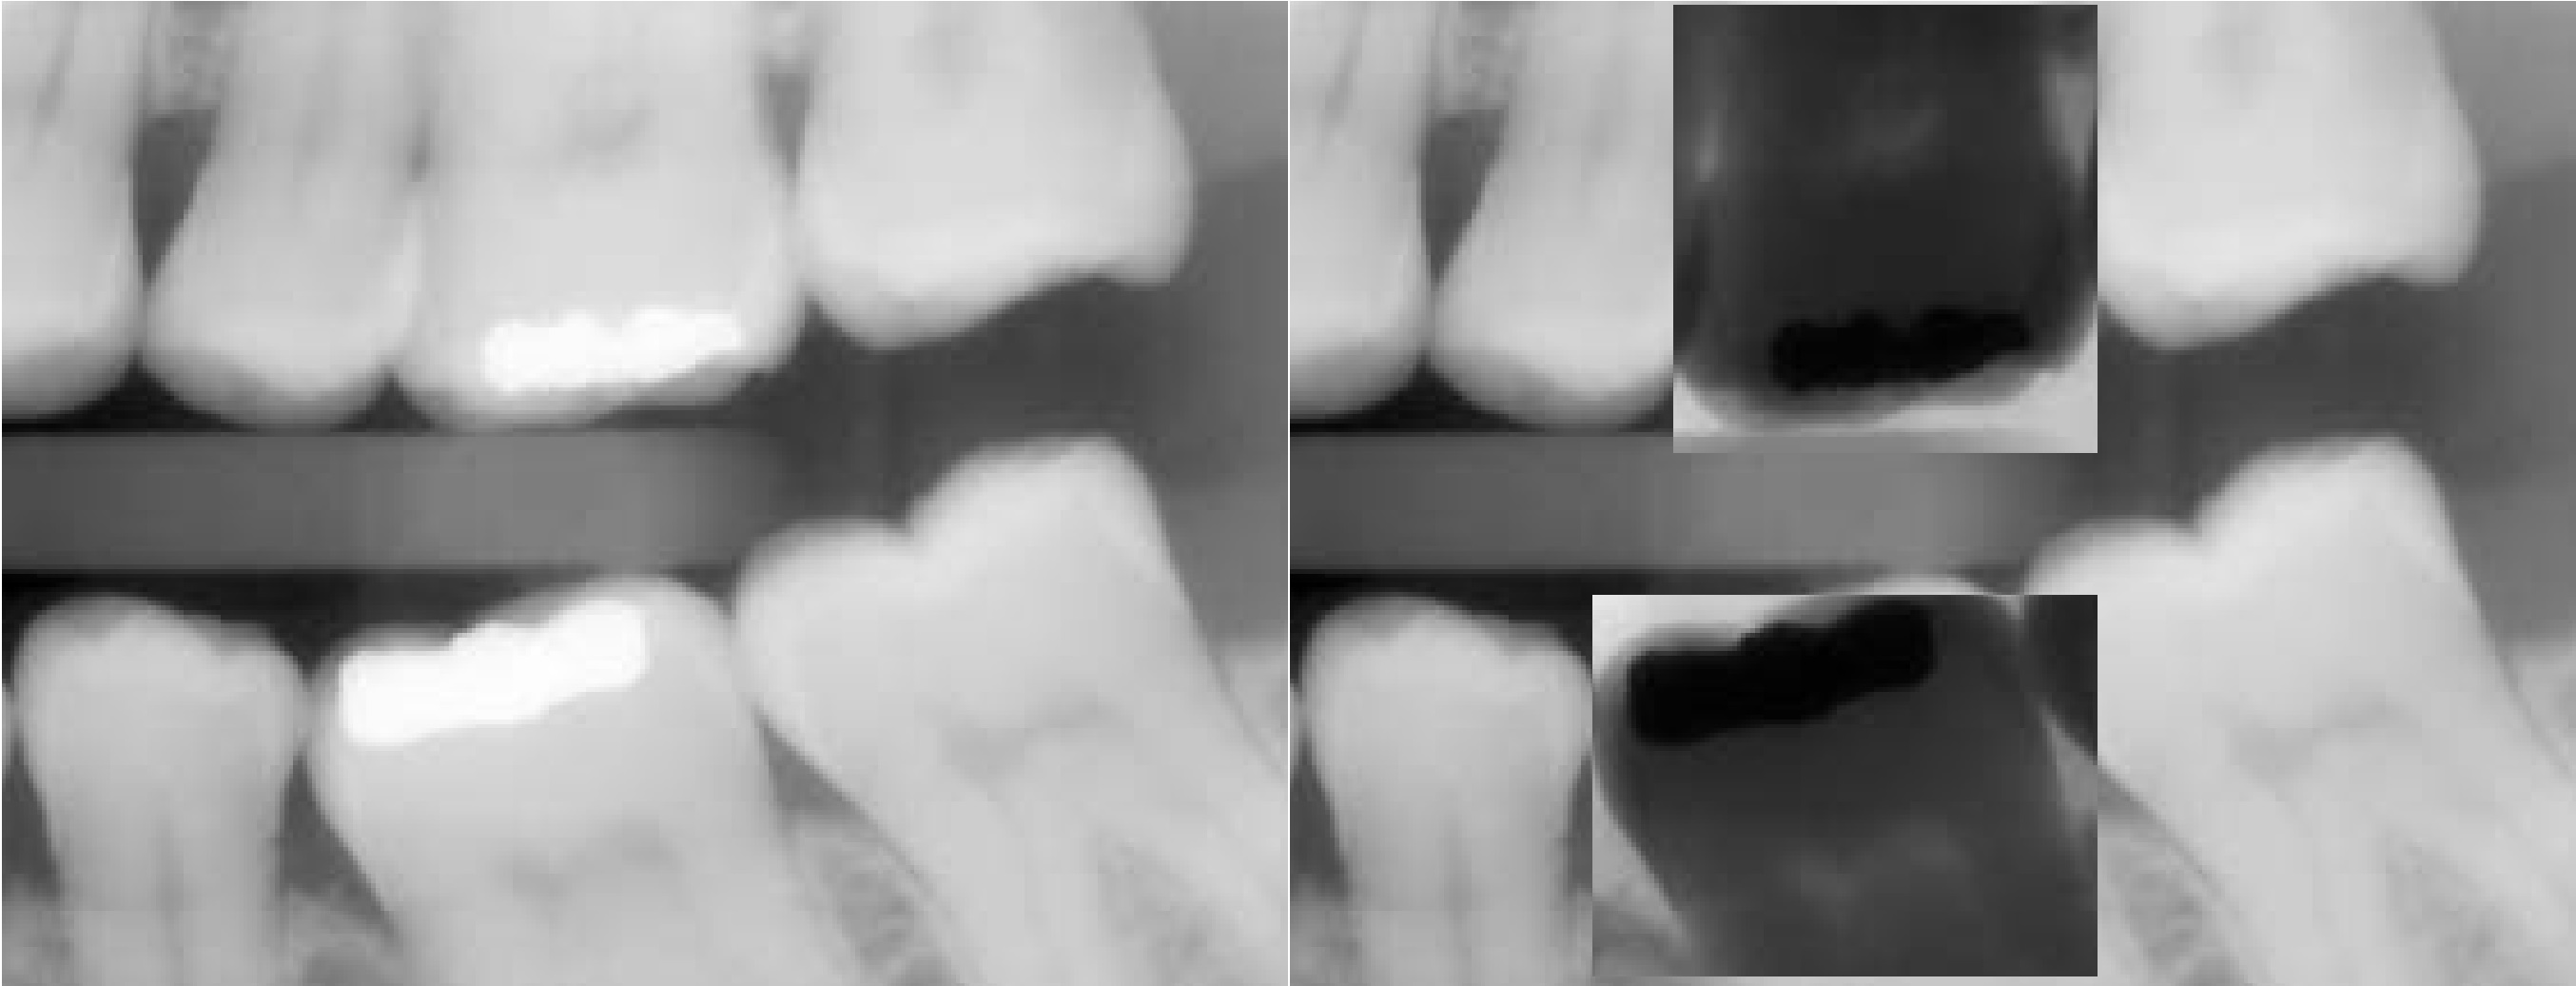

In [52]:
# 5

print(' Image Masking (OR NOT NAND XOR) ')
print('-----------------------------')

# original = cv.imread('/content/drive/MyDrive/Images/Images/teeth.jpg')
# mask_img = np.zeros(original.shape, dtype=np.uint8)
# mask_top = cv.rectangle(mask_img,pt1=(405,5),pt2=(850,475),color=(255,255,255),thickness=-1)
# mask_bottom = cv.rectangle(mask_img, pt1=(320,625), pt2=(850,1025), color=(255,255,255), thickness=-1)

result_1 = original | mask_top
result_2 = original | mask_bottom

print('OR')
print('-----------------------------')
final_frame = cv.hconcat((img, result_1))
cv2_imshow(final_frame)

print('NOT')
print('-----------------------------')
result_1 = ~original | ~mask_top
result_2 = ~original | ~mask_bottom

final_frame = cv.hconcat((img, result_1))
cv2_imshow(final_frame)

print('NAND')
print('-----------------------------')
result_1 = original & ~mask_top
result_2 = original & ~mask_bottom

final_frame = cv.hconcat((img, result_1))
cv2_imshow(final_frame)

print('XOR')
print('-----------------------------')
result_1 = original ^ mask_top
result_2 = original ^ mask_bottom

final_frame = cv.hconcat((img, result_1))
cv2_imshow(final_frame)
